In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load CSV Files into DataFrames
customers = pd.read_csv('C:/Users/LOKESH/OneDrive/Desktop/DATA SCIENCE ASSESMENT/Customers.csv')
products = pd.read_csv('C:/Users/LOKESH/OneDrive/Desktop/DATA SCIENCE ASSESMENT/Products.csv')
transactions = pd.read_csv('C:/Users/LOKESH/OneDrive/Desktop/DATA SCIENCE ASSESMENT/Transactions.csv')


In [4]:
# Quick snapshot
print(customers.head())
print(products.head())
print(transactions.head())

# Check data structure and summary
print(customers.info())
print(products.info())
print(transactions.info())



  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [8]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Handle missing values if any
customers.dropna(subset=['CustomerID'], inplace=True)
transactions.dropna(subset=['CustomerID', 'ProductID'], inplace=True)

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [34]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Feature Engineering: Extract year from SignupDate
customers['SignupYear'] = customers['SignupDate'].dt.year

# Extract month from the transaction date
transactions['Month'] = transactions['TransactionDate'].dt.month


In [5]:
# Summary statistics
print(customers.describe())
print(products.describe())
print(transactions.describe())

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2022-04-16
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


Region distribution:
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


C:\Users\LOKESH\AppData\Local\Temp\ipykernel_16504\3127188260.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='Set2')


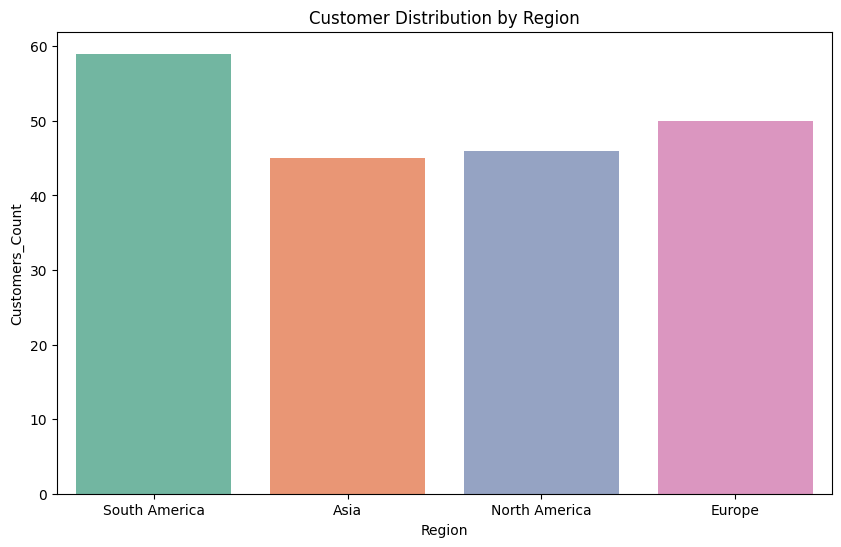

In [41]:
# Business Insights 1: Customer Region Distribution
region_distribution = customers['Region'].value_counts()
print("Region distribution:\n", region_distribution)

# Data Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', palette='Set2')
plt.title('Customer Distribution by Region')
plt.ylabel('Customers_Count')
plt.show()


Signup trends by year:
 SignupYear
2022    64
2023    57
2024    79
dtype: int64


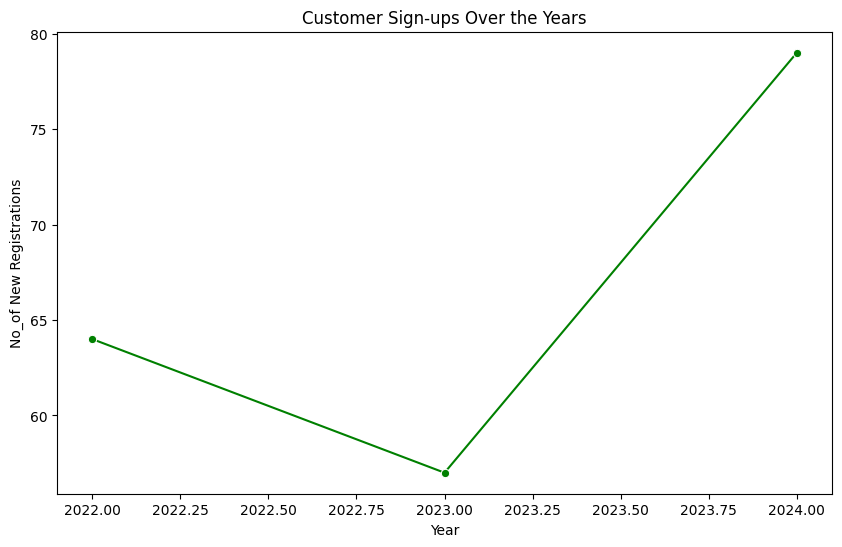

In [44]:
# Business Insights 2: Signup Year Trends
signup_trends = customers.groupby('SignupYear').size()
print("Signup trends by year:\n", signup_trends)

plt.figure(figsize=(10, 6))
sns.lineplot(x=signup_trends.index, y=signup_trends.values,marker='o', color='green')
plt.title('Customer Sign-ups Over the Years')
plt.xlabel('Year')
plt.ylabel('No_of New Registrations')
plt.show()

Category sales:
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


C:\Users\LOKESH\AppData\Local\Temp\ipykernel_16504\2348519426.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='Set3')


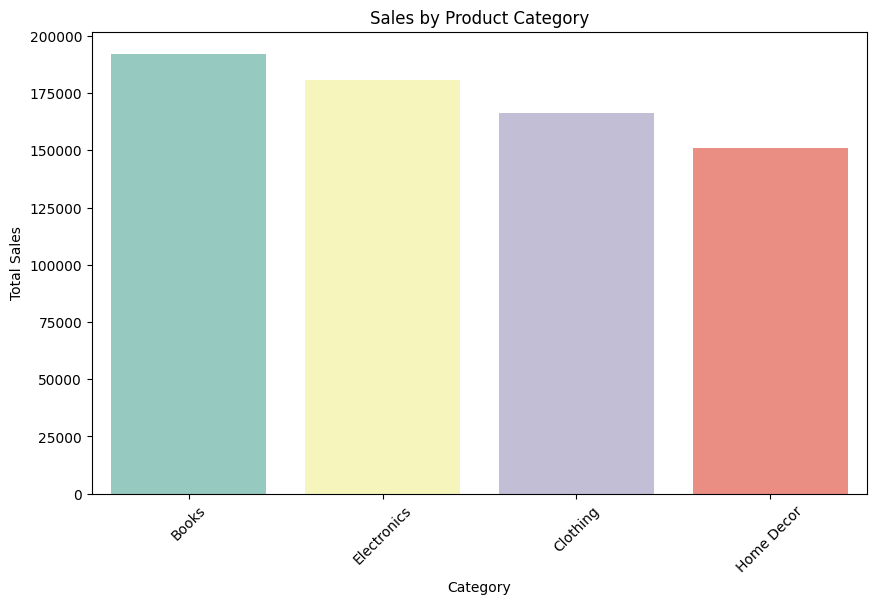

In [55]:
# Business Insights 3: Product Category Sales
merged_df = pd.merge(transactions, products, on='ProductID')
category_sales = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("Category sales:\n", category_sales)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='Set3')
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

CustomerID
C0109    11
C0156    11
C0008    10
C0175    10
C0141    10
C0065    10
C0165     9
C0084     9
C0093     9
C0075     9
dtype: int64


C:\Users\LOKESH\AppData\Local\Temp\ipykernel_16504\970383953.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='viridis')


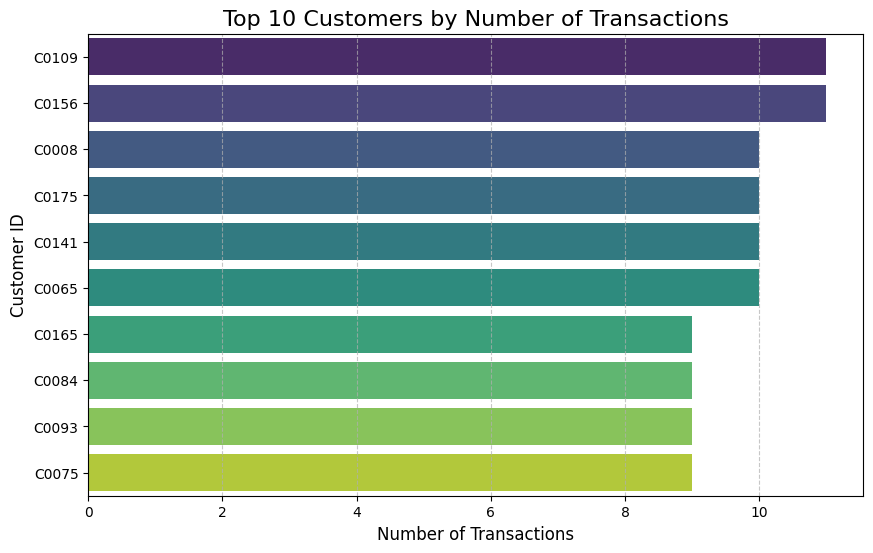

In [58]:
# Business Insights 4: Top 10 Customers by Number of Transactions
customer_transactions = transactions.groupby('CustomerID').size()
# Optional: Bar plot for customers with the highest number of transactions
top_customers = customer_transactions.sort_values(ascending=False).head(10)
print(top_customers)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='viridis')
plt.title('Top 10 Customers by Number of Transactions', fontsize=16)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

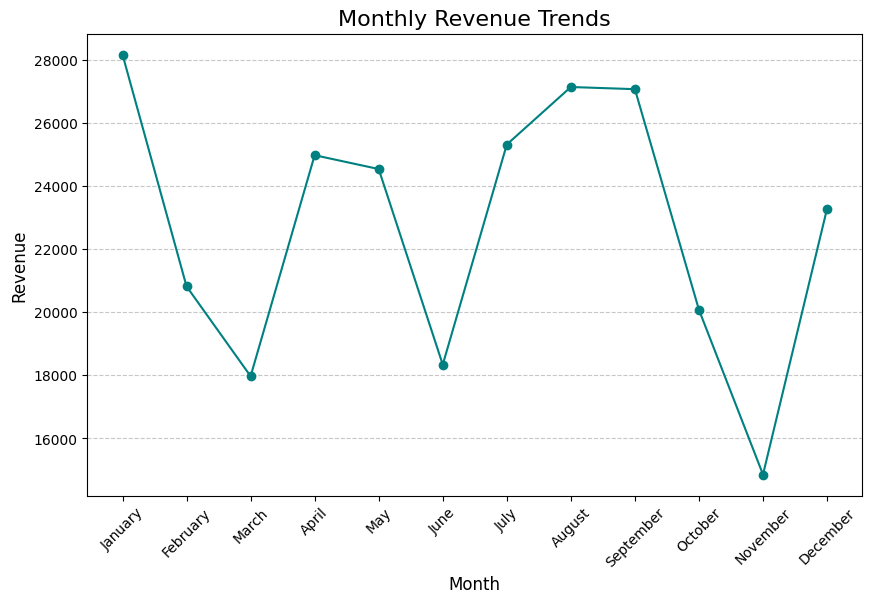

In [67]:
# Business Insights 5: Monthly Sales Trends
monthly_revenue = transactions.groupby('Month')['Price'].sum().reset_index()
monthly_revenue['month_name'] = monthly_revenue['Month'].apply(
    lambda x: ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December'][x - 1]
)

monthly_revenue = monthly_revenue.sort_values(by='Month')

plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['month_name'], monthly_revenue['Price'], marker='o', color='teal')
plt.title('Monthly Revenue Trends', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
